This notebook shows how the FluxNormaliser processor and preview configuration tool works on different dataset types

In [3]:

import numpy as np
from cil.utilities import dataexample
from cil.processors import FluxNormaliser
from cil.utilities.display import show2D
from cil.framework import AcquisitionGeometry

Create some different data types

The flux can be used to normalise with a scalar value. Each projection is divided by the flux then multiplied by the target

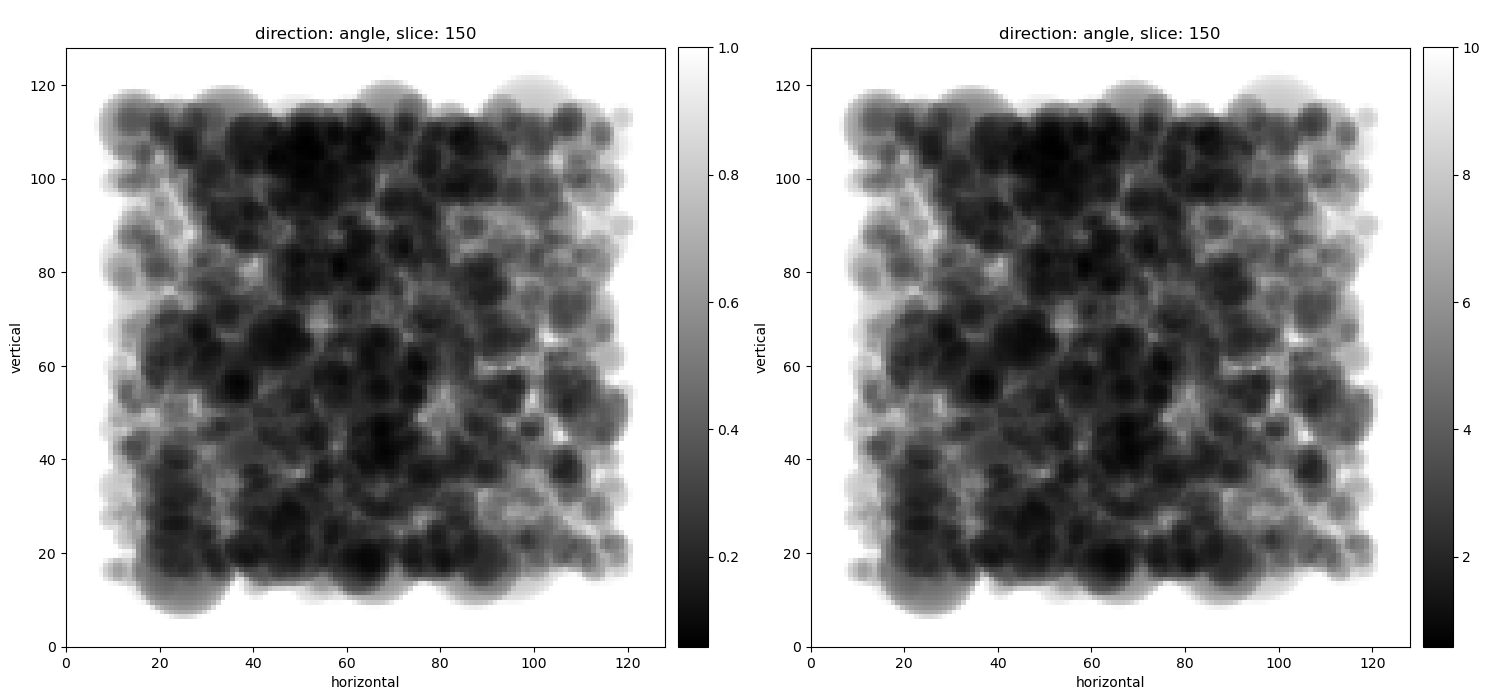

In [4]:
data = dataexample.SIMULATED_CONE_BEAM_DATA.get()
processor = FluxNormaliser(flux=1, target=10)
processor.set_input(data)
data_norm = processor.get_output()
show2D([data, data_norm])

Or use a range of flux values the same length as the number of projections. Plot the sinogram to show the effect of normalising by a different value for each angle.

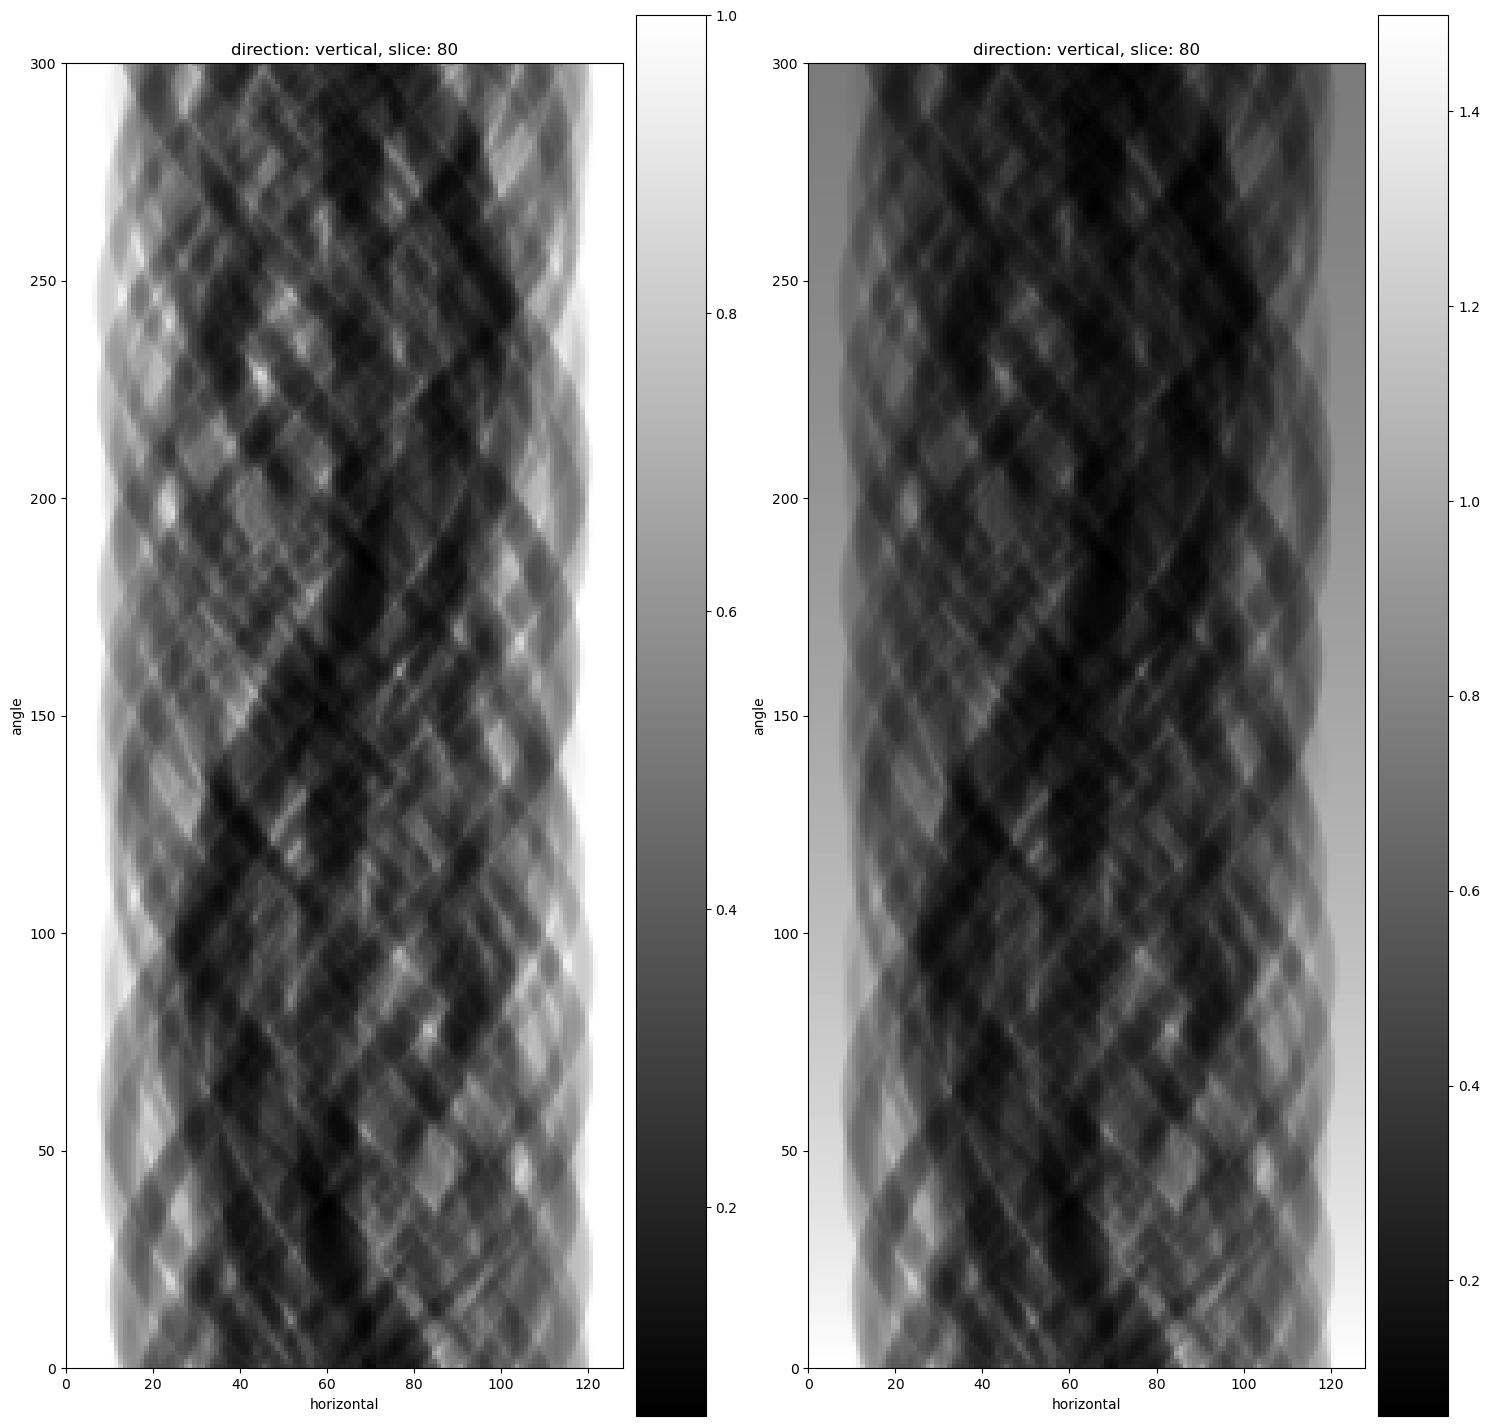

In [5]:
processor = FluxNormaliser(flux=np.arange(1,2,(2-1)/(data.get_dimension_size('angle'))))
processor.set_input(data)
data_norm = processor.get_output()
show2D([data, data_norm], slice_list=('vertical',80))

Alternatiely get the flux from a region of interest in the data. 
Choose an roi and check how it looks using `preview_configuration()`. The top plots show the roi on the projections with the minimum and maximum intensity in the roi. The bottom plot shows how the mean, minimum and maximum intensity in the roi varies with angle.

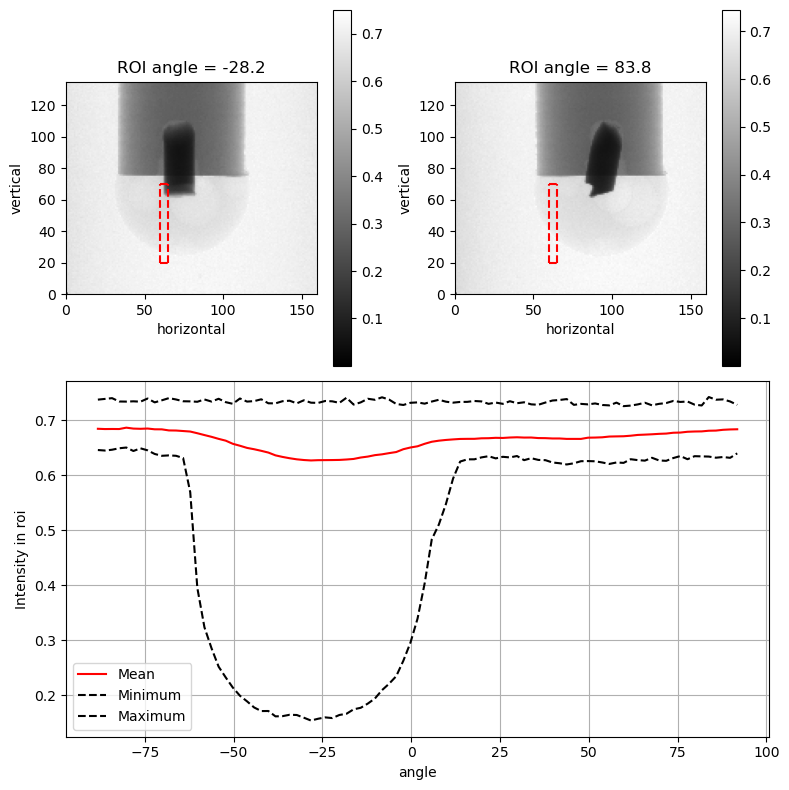

In [11]:
data = dataexample.SYNCHROTRON_PARALLEL_BEAM_DATA.get()
roi = {'horizontal':(60,65),'vertical':(20,70)}

processor = FluxNormaliser(roi=roi)
processor.set_input(data)
processor.preview_configuration()

The plot shows the selected roi contains some of the data at certain angles so we see there is a big variation in the maximum intensity measured in the roi. We also get a warning that the selected roi contains more than 10% of the data range

Try adjusting the roi to only select the background

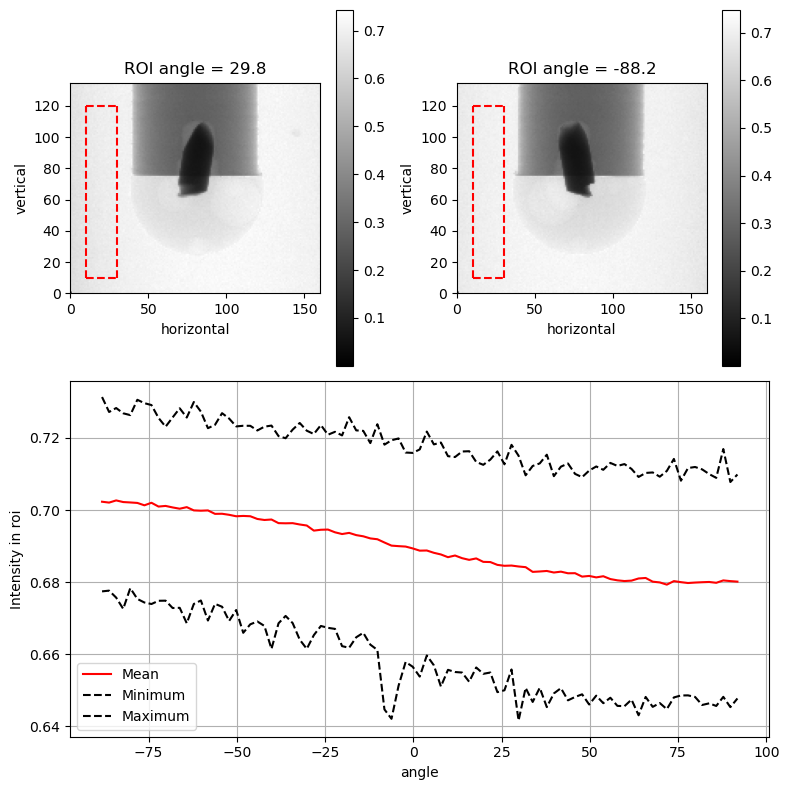

In [12]:
roi = {'horizontal':(10,30),'vertical':(10,120)}

processor = FluxNormaliser(roi=roi)
processor.set_input(data)
processor.preview_configuration()

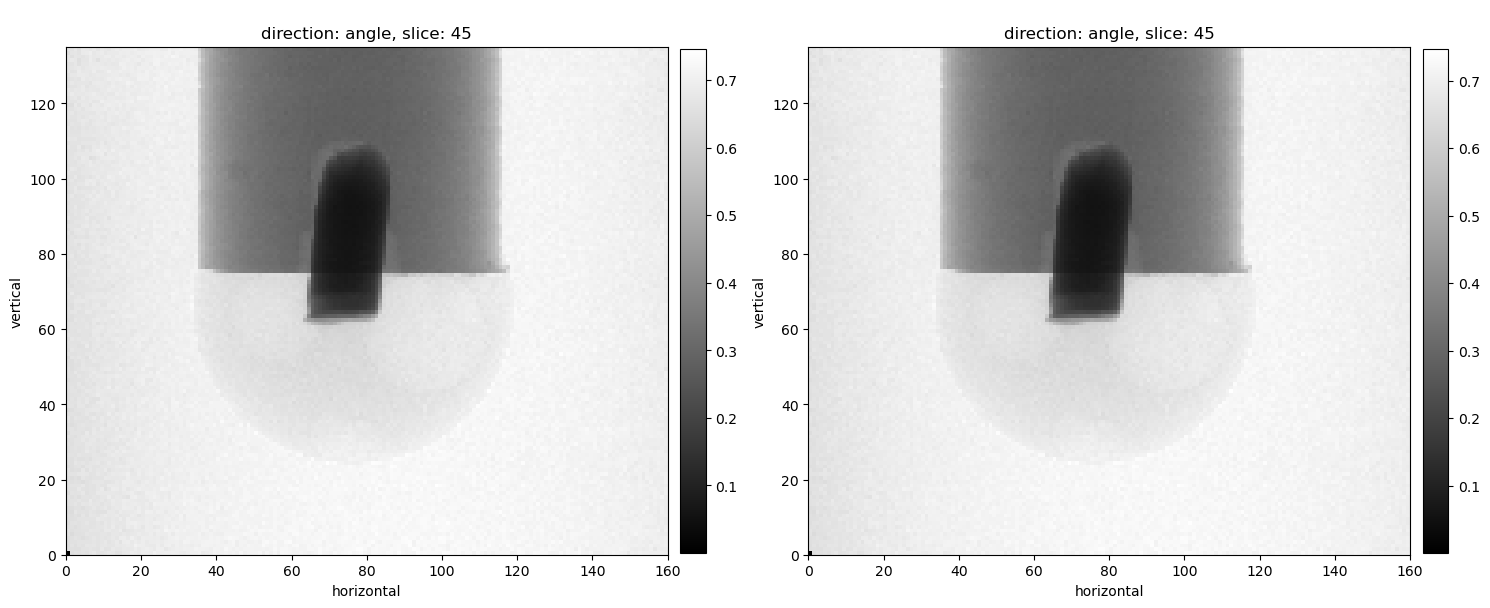

In [8]:
data_norm = processor.get_output()
show2D([data, data_norm])


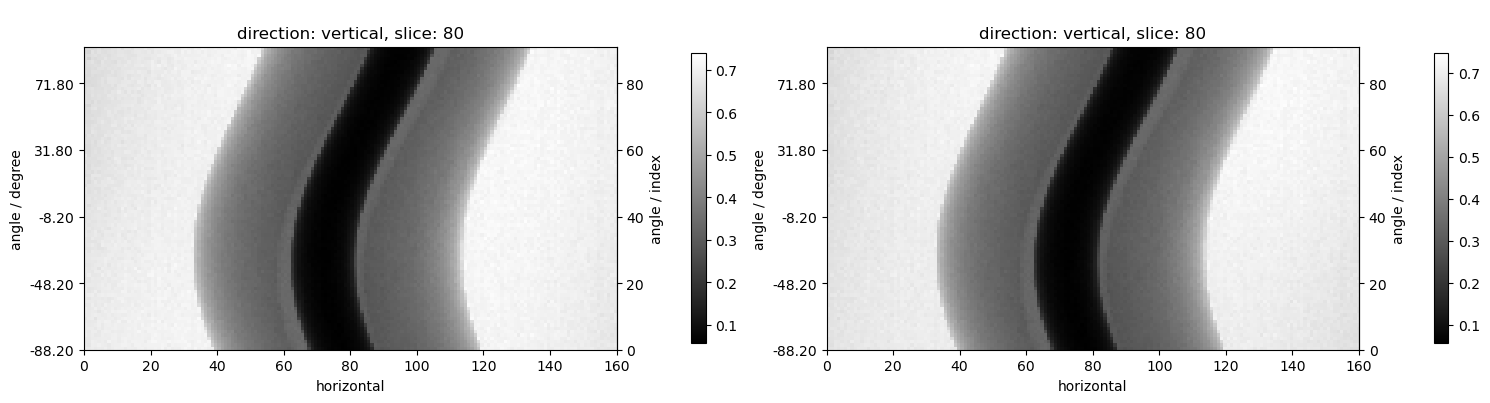

In [13]:
show2D([data, data_norm], slice_list=('vertical',80))

This should also work on a single slice of the data

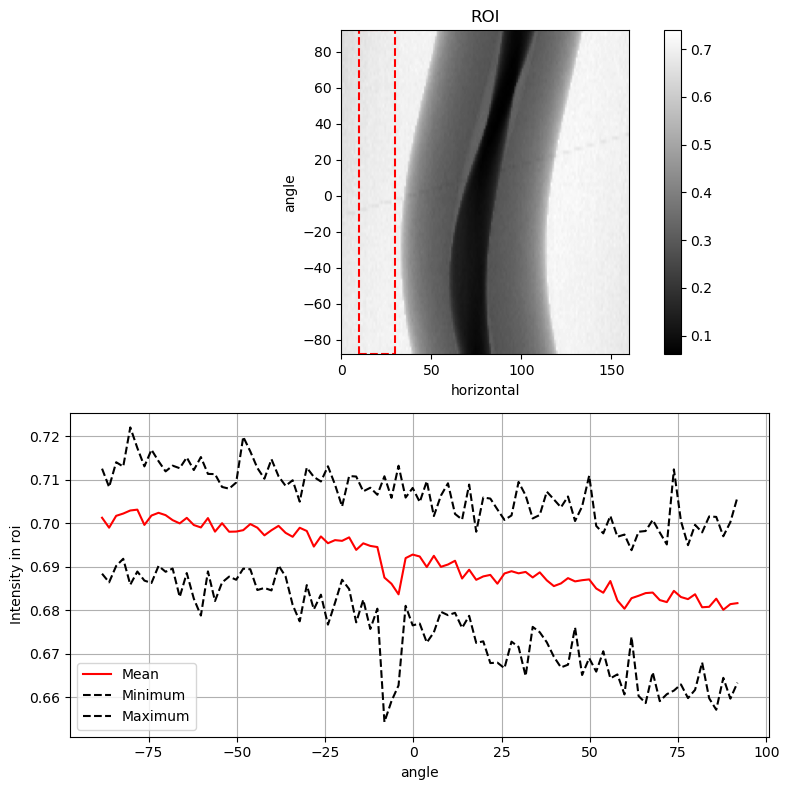

In [9]:
data_slice = data.get_slice(vertical=100)
roi = {'horizontal':(10,30)}

processor = FluxNormaliser(roi=roi)
processor.set_input(data_slice)
processor.preview_configuration()

For multichannel data you can select the channel to display in `preview_configuration` to check how the roi looks for each channel, by default the central channel is shown

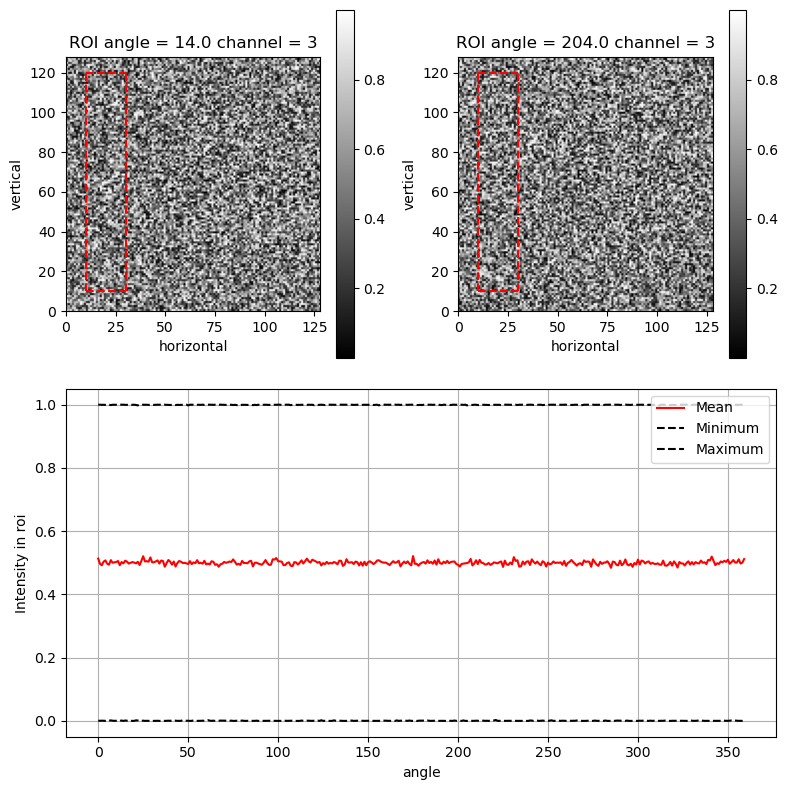

In [10]:
ag = AcquisitionGeometry.create_Parallel3D()\
    .set_angles(np.linspace(0,360,360,endpoint=False))\
    .set_panel([128,128],0.1)\
    .set_channels(4)
data = ag.allocate('random')

roi = {'horizontal':(10,30),'vertical':(10,120)}

processor = FluxNormaliser(roi=roi)
processor.set_input(data)
processor.preview_configuration(channel=3)